Import dependencies

In [3]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import plotly.express as px

# Import and read the healthcare-dataset-stroke-data.csv.

stroke_df = pd.read_csv("healthcare-dataset-stroke-data.csv")
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Data pre-processing


In [4]:
stroke_df.sample (10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2707,46498,Female,57.00,0,0,Yes,Private,Urban,217.40,36.6,never smoked,0
841,12106,Male,53.00,1,0,Yes,Govt_job,Rural,78.16,36.6,never smoked,0
5007,42647,Female,59.00,0,0,Yes,Govt_job,Urban,101.19,29.9,formerly smoked,0
3226,71414,Female,2.00,0,0,No,children,Urban,125.03,19.8,Unknown,0
1821,38440,Male,16.00,0,0,No,Private,Rural,133.20,26.3,Unknown,0
2961,48922,Male,55.00,1,1,Yes,Private,Rural,64.92,32.1,smokes,0
3455,4297,Male,75.00,0,0,Yes,Govt_job,Urban,223.14,27.8,never smoked,0
838,39375,Female,40.00,0,0,Yes,Private,Rural,119.52,34.6,never smoked,0
5079,42709,Male,1.72,0,0,No,children,Urban,77.28,17.1,Unknown,0
3404,22194,Female,36.00,0,0,Yes,Private,Urban,96.70,31.4,Unknown,0


In [5]:
# Get a brief summary of the crowdfunding_info DataFrame.
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
stroke_df.describe()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


DATA CLEANING

In [7]:
stroke_df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
#remove unnecessary columns
stroke_df.drop(['id'],axis=1,inplace = True)

In [9]:
#remove duplicates values
stroke_df.drop_duplicates(inplace=True)

In [10]:
#null data handled
stroke_df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Determining outliers

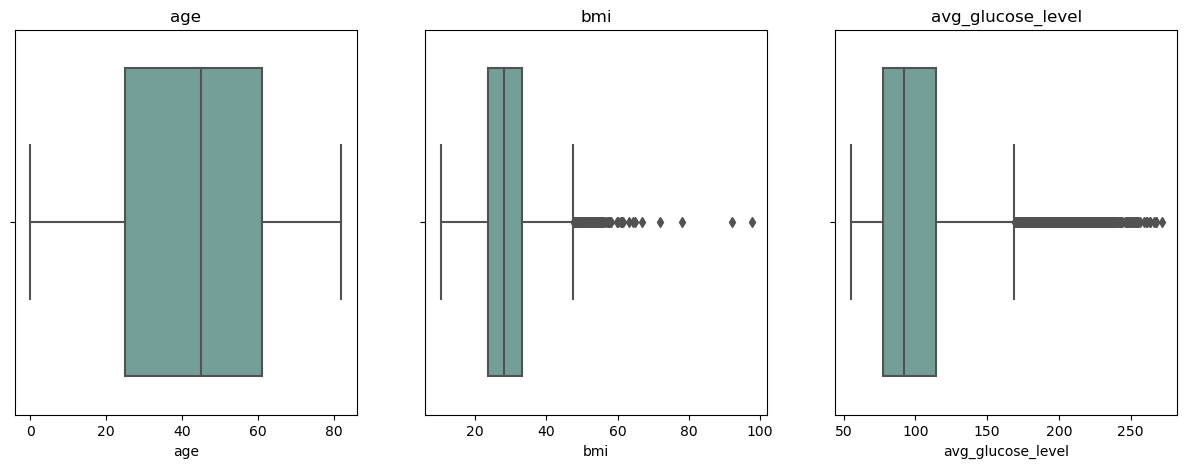

In [11]:
num_cols = ['age','bmi','avg_glucose_level']

plt.figure(figsize=(15, 5))
for i in range(3) :
    plt.subplot(1,3,i+1)
    
    sns.boxplot(x=stroke_df[num_cols[i]],color='#6DA59D')
    plt.title(num_cols[i])
plt.show()

In [12]:
def detect_outliers(data,column):
    q1 = stroke_df[column].quantile(.25)
    q3= stroke_df[column].quantile(.75)
    IQR = q3-q1
    
    lower_bound = q1 - (1.5*IQR)
    upper_bound = q3 + (1.5*IQR)
    
    ls = stroke_df.index[(stroke_df[column] <lower_bound) | (stroke_df[column] > upper_bound)]
    
    return ls

In [13]:
index_list = []

for column in num_cols:
    index_list.extend(detect_outliers(stroke_df,column))

# remove duplicated indices in the index_list and sort it 
index_list = sorted(set(index_list))
before_remove = stroke_df.shape

stroke_df =stroke_df.drop(index_list)
after_remove = stroke_df.shape

print(f'''Shape of data before removing outliers : {before_remove}
Shape of data after remove : {after_remove}''')

Shape of data before removing outliers : (5110, 11)
Shape of data after remove : (4401, 11)


In [14]:
#before_remove = stroke_df.shape

#stroke_df =stroke_df.drop(index_list)
#after_remove = stroke_df.shape

#print(f'''Shape of data before removing outliers : {before_remove}
#Shape of data after remove : {after_remove}''')

DATA VISUALISATION

In [15]:
# Create a series of average BMI for each age
avg_bmi_by_age = stroke_df.groupby('age')['bmi'].mean()
avg_bmi_by_age

age
0.08     15.500000
0.16     14.766667
0.24     17.400000
0.32     18.080000
0.40     15.850000
           ...    
78.00    27.331507
79.00    27.916129
80.00    27.924000
81.00    27.597872
82.00    27.335897
Name: bmi, Length: 104, dtype: float64

In [16]:
# Replace NaN values in the "bmi" column with the average BMI of the corresponding age
def replace_bmi(row):
    if pd.isna(row['bmi']):
        return avg_bmi_by_age[row['age']]
    else:
        return row['bmi']

stroke_df['bmi'] = stroke_df.apply(replace_bmi, axis=1)

In [17]:
# Check the info of the dataframe (if the NaN values in the 'bmi' column are replaced)
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4401 entries, 2 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4401 non-null   object 
 1   age                4401 non-null   float64
 2   hypertension       4401 non-null   int64  
 3   heart_disease      4401 non-null   int64  
 4   ever_married       4401 non-null   object 
 5   work_type          4401 non-null   object 
 6   Residence_type     4401 non-null   object 
 7   avg_glucose_level  4401 non-null   float64
 8   bmi                4401 non-null   float64
 9   smoking_status     4401 non-null   object 
 10  stroke             4401 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 412.6+ KB


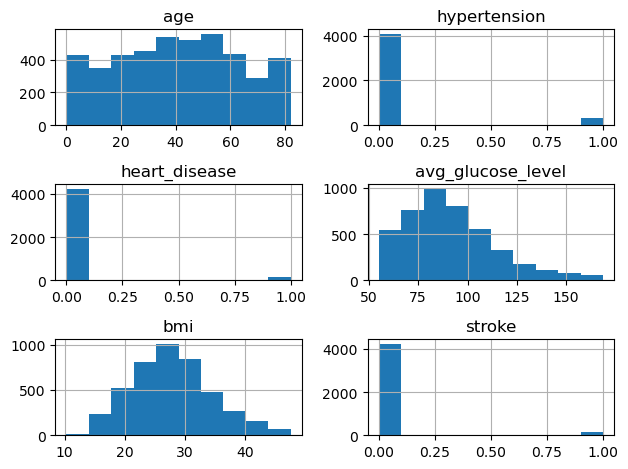

In [18]:
# Examine Data Distribution on numerical columns
stroke_df.hist()
plt.tight_layout()

In [19]:
# Look at gender value counts
gender_counts = stroke_df['gender'].value_counts()
gender_counts

Female    2599
Male      1801
Other        1
Name: gender, dtype: int64

In [20]:
# Drop the record with gender = 'Other' (since there is only 1 record)
stroke_df = stroke_df.drop(stroke_df[stroke_df['gender'] == 'Other'].index)

In [21]:
# Check if 'Other' is dropped on gender column
stroke_df['gender'].unique()

array(['Male', 'Female'], dtype=object)

Text(0.5, 1.0, 'Gender Distribution')

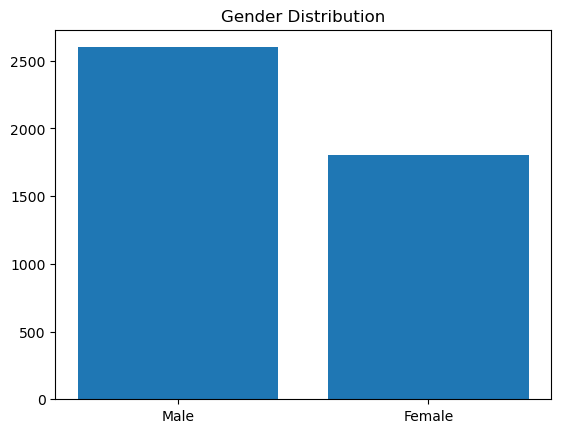

In [22]:
# Examine the distribution of gender column
plt.bar(stroke_df['gender'].unique(), stroke_df['gender'].value_counts())
plt.title('Gender Distribution')

In [23]:
# Look at work type value counts
work_counts = stroke_df['work_type'].value_counts()
work_counts

Private          2488
children          675
Self-employed     662
Govt_job          553
Never_worked       22
Name: work_type, dtype: int64

Text(0.5, 1.0, 'Work Type Distribution')

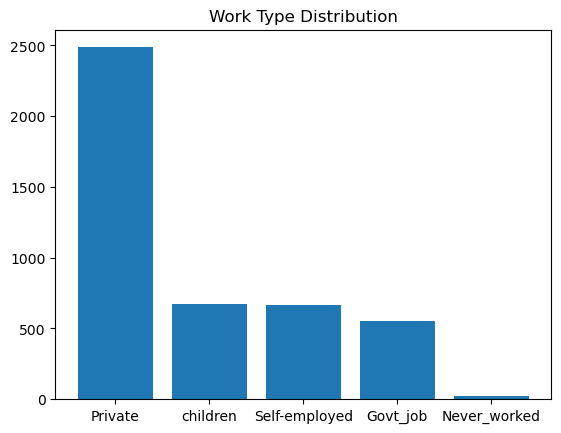

In [24]:
# Examine the distribution of work type column
plt.bar(work_counts.index, work_counts)
plt.title('Work Type Distribution')

In [25]:
# Look at smoking status value counts
smoke_counts = stroke_df['smoking_status'].value_counts()
smoke_counts

never smoked       1598
Unknown            1422
formerly smoked     708
smokes              672
Name: smoking_status, dtype: int64

Text(0.5, 1.0, 'Smoking Status Distribution')

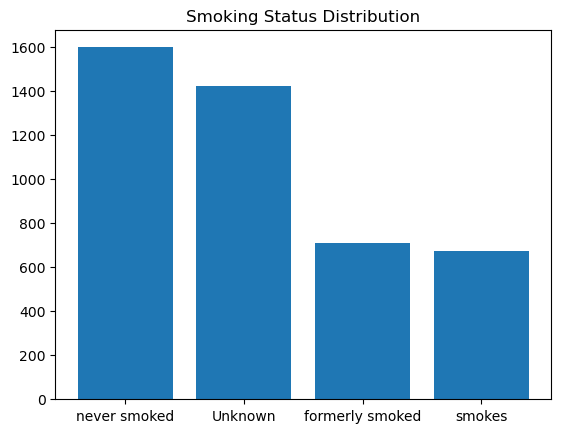

In [26]:
# Examine the distribution of smoking status column
plt.bar(smoke_counts.index, smoke_counts)
plt.title('Smoking Status Distribution')

In [27]:
#residence types 
Residence_types = dict(stroke_df['Residence_type'].value_counts())
fig = px.pie(names = Residence_types.keys(),values = Residence_types.values(),title = 'Residence type',color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.update_traces(textposition='inside', textinfo='percent+label')

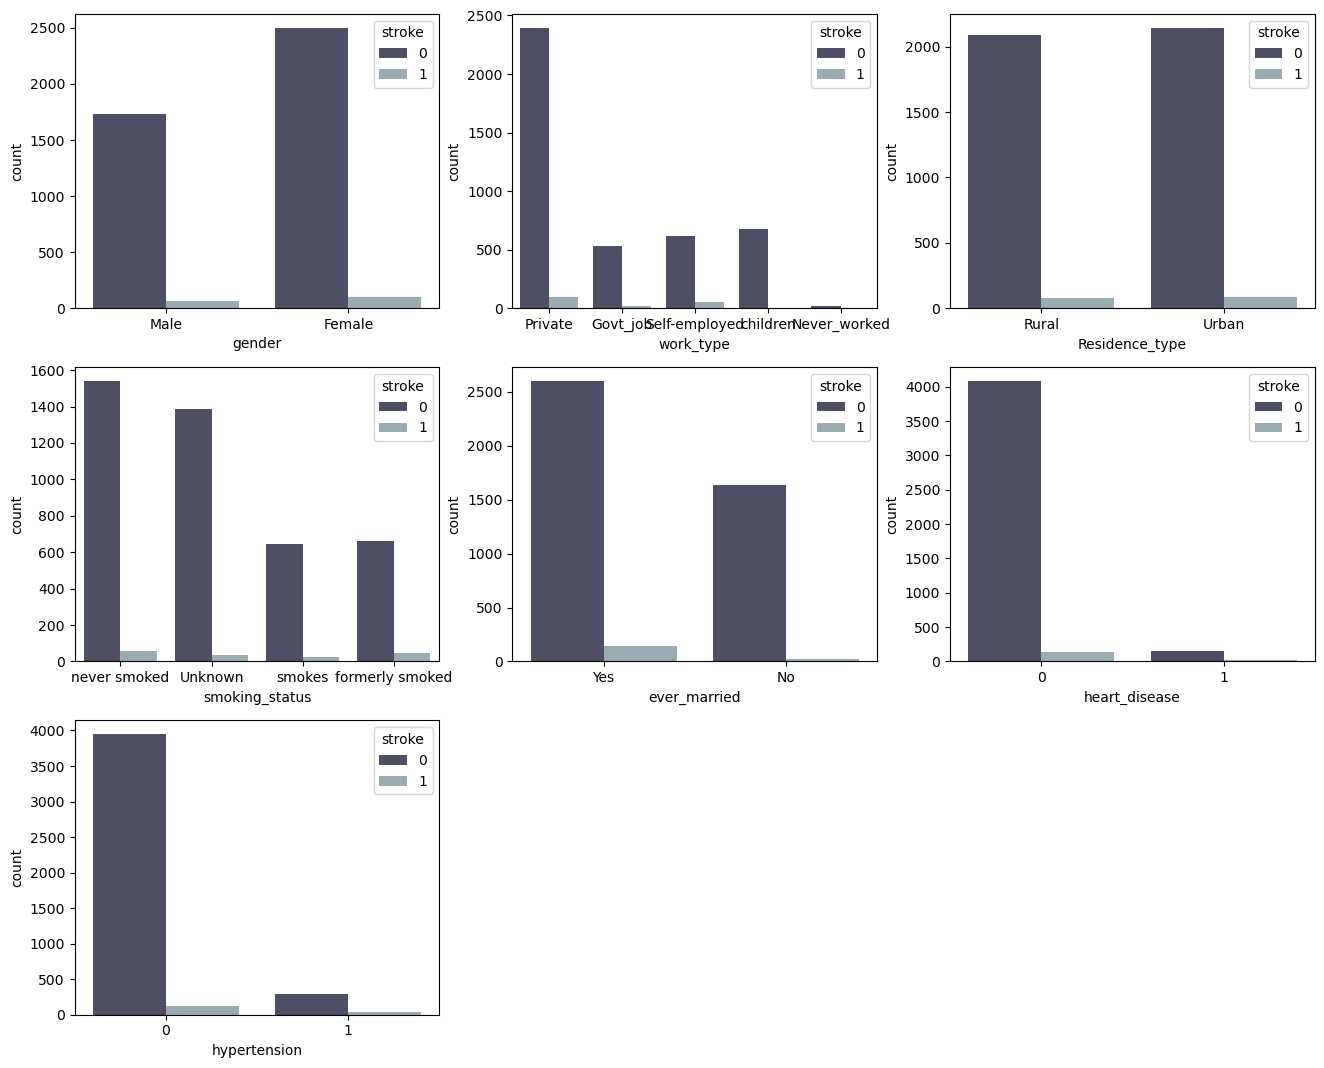

In [28]:
cols = ['gender','work_type','Residence_type','smoking_status','ever_married','heart_disease','hypertension']
plt.figure(figsize=(16,13))
for i in range(len(cols)):
    plt.subplot(3,3,i+1)
    
    sns.countplot(x=stroke_df[cols[i]],hue = stroke_df['stroke'],palette = 'bone')

<Axes: ylabel='Count'>

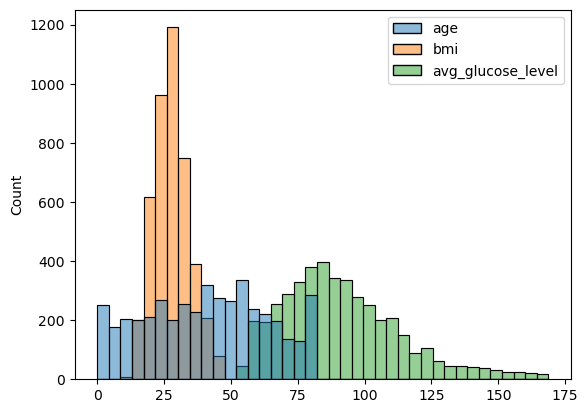

In [29]:
# Examine the distribution of 'age', 'bmi' and 'avg_glucose_level'
sns.histplot(stroke_df[['age', 'bmi', 'avg_glucose_level']])

In [30]:
# Look at the stroke outcome value counts
stroke_counts = stroke_df['stroke'].value_counts()
stroke_counts

0    4235
1     165
Name: stroke, dtype: int64

Text(0.5, 1.0, 'Stroke Outcome Distribution')

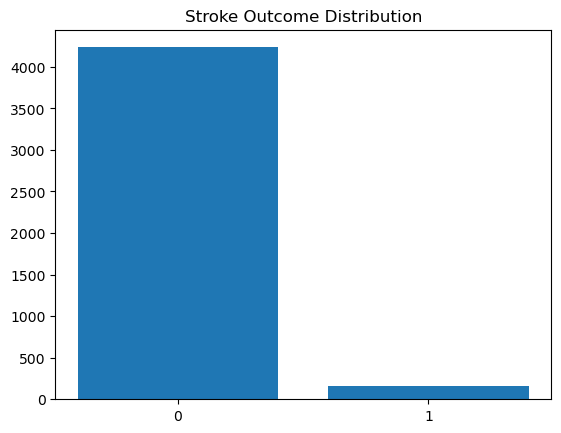

In [31]:
# Examine the distribution of stroke column
plt.bar(x = stroke_counts.index, height = stroke_counts, tick_label = ['0', '1'])
plt.title('Stroke Outcome Distribution')

Findings: The 0s and 1s in stroke column is highly imbalanced

In [32]:
# Split the data into X and y
y = stroke_df['stroke']
X = stroke_df.drop(columns=['stroke'])

BUILD MACHINE LEARNING MODELS, Train model on resampled data using RandomOverSampler

In [33]:
# Import RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

In [34]:
# Perform oversampling with RandomOverSampler
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

In [35]:
# Convert categorical data to numeric with `pd.get_dummies` (only on X, bc y is already 0s and 1s)
X_encoded = pd.get_dummies(X_ros)

In [36]:
# Create a StandardScaler instance
scaler = StandardScaler(with_mean=False)

# Fit the StandardScaler
X_scaler = scaler.fit(X_encoded)

# Split the processed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_ros, test_size = 0.2, random_state=1)

TRAIN AND EVALUATE THE MODEL

In [37]:
# Dependencies
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score

In [38]:
# Instantiate a Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=1)

In [39]:
# Fit the model with training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

In [40]:
# Make predictions on the test set
predictions = rf_model.predict(X_test)

In [41]:
# Evaluate the model with Confusion Matrix and accuracy score
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

acc_score = accuracy_score(y_test, predictions)

In [42]:
# Generate a confusion matrix for the model
display(cm_df)

,Predicted 0,Predicted 1
Actual 0,843,7
Actual 1,0,844


In [43]:
# Look at the accuracy score 
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.9958677685950413


In [44]:
# Look at the classification report
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       850
           1       0.99      1.00      1.00       844

    accuracy                           1.00      1694
   macro avg       1.00      1.00      1.00      1694
weighted avg       1.00      1.00      1.00      1694



Evaluation: We have accomplished an high overall accuracy rate of approximately 99.6% when predicting both class 0 and 1 using this model. 

*Note: After comparing the overall accuracy score, false positive rate and false negative rate, we've decided this is the best model(our final model!).

In [45]:
pip install pickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [48]:
# For the front end
import pickle
with open('model/model.pkl','wb') as f:
  pickle.dump(rf_model,f)